<h3 style="color:red;">Preterm neonate of 31 weeks of gestation and 1.5 kg at 48 hours</h3>

 Model 'normal neonate' loaded and initialized correctly.
Scaling to gestational age 24 weeks
Weight (Fenton p50) = 0.651 kg
Height (Fenton p50) = 0.309 m
Total blood volume = 52.08000000000001 ml (80.00000000000001 ml/kg)
Total gas volume = 19.52999999999999 ml (29.999999999999986 ml/kg)
Systole target = 51.21 mmHg
Diastole target = 23.07 mmHg
Mean arterial pressure target = 34.22 mmHg
Respiratory rate target = 40.0 bpm
Vt/RR ratio target = 7.890120000000001e-05 L/bpm/kg
Minute volume target = 0.1302 L/min
 Ready in 3.6 sec. Average model step in 0.0304 ms.
Heart.heart_rate: max  105.57529 min  100.19615
AA.pres         : max   45.29502, min   25.49156 mmHg
PA.pres         : max   33.10383, min   13.19637 mmHg
LV_AA.flow      : net  136.15984, forward  136.15984, backward        0.0 ml/kg/min, stroke volume:    1.30922 ml/kg, 
RV_PA.flow      : net  146.15396, forward  146.15396, backward        0.0 ml/kg/min, stroke volume:    1.40531 ml/kg, 
SVC_RA.flow     : net   58.52756, forward

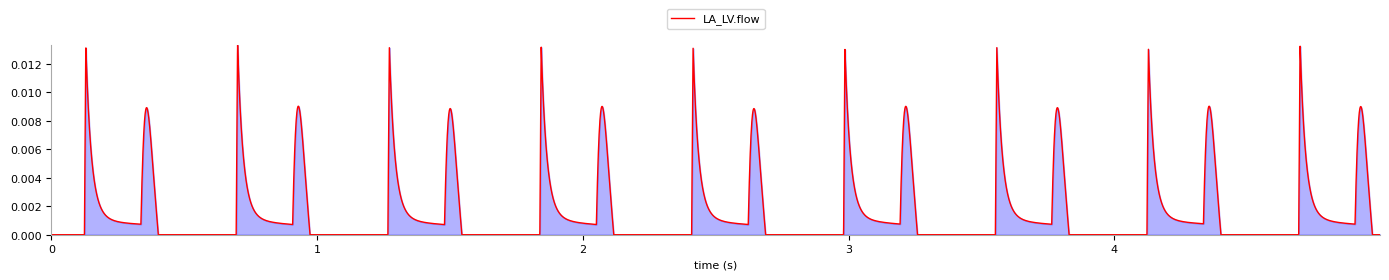

LA_LV.flow      : net  139.93384, forward  139.93384, backward        0.0 ml/kg/min, stroke volume:     1.4575 ml/kg, 


{'heartrate': 104.85104347806522,
 'spo2_pre': 92.37183291311494,
 'spo2_post': 91.08707353335481,
 'abp_systole': 44.91616,
 'abp_diastole': 25.59485,
 'pap_systole': 33.18058,
 'pap_diastole': 13.51897,
 'cvp': 3.11454816,
 'resp_rate': 47.43643636068239,
 'pH': 7.307595530621721,
 'po2': 8.334039408680827,
 'pco2': 7.088790071775655,
 'hco3': 26.30578538645296,
 'be': -0.984072551685231}

In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)


# scale the baseline patient to a gestational age of 24 weeks
model._scaling.scale_to_gestational_age(24, True)


# stabilize the model by calculating 60 seconds
neo.calculate(60)

# get the validation data
neo.validate()
neo.plot_time_graph(
    ["LA_LV.flow"],
    sampleinterval=0.0005,
    time_to_calculate=5.0,
    weight_based=True,
)
neo.get_vitals()

In [ ]:
neo.validate()

<h5 style="color:red;">Model run results</h5>

In [ ]:
model._scaling.set_scale_factors(
    res_circ_factor=0.6,
    el_base_circ_factor=0.8,
    el_min_circ_factor=0.6,
    el_max_circ_factor=0.8,
    res_resp_factor=1.0,
    el_base_resp_factor=1.0,
    output=True,
)
neo.calculate(60)
neo.validate()
neo.get_vitals()

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="450"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="450"></img><br>
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img> -->

<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>